In [3]:
import shapefile_library
import ee
import geemap
import os
Map = geemap.Map()

In [2]:
destination_folder = input('destination_folder: ')

destination_folder: D:\Users\aster\Desktop\SNOW_DEPTH\LANDCOVER-ESA


In [4]:
list_shp = [shapefile_library.NSO_central, shapefile_library.NSO_khangai,
            shapefile_library.NSO_eastern, shapefile_library.NSO_ulaanbaatar,
            shapefile_library.NSO_western, shapefile_library.NSO_all, 
            shapefile_library.LANDCOVER_barren, shapefile_library.LANDCOVER_grassland,
            shapefile_library.LANDCOVER_trees, shapefile_library.LANDCOVER_mosslichen]

In [5]:
print('0 central', '1 khangai', '2 eastern', '3 ulaanbaatar', '4 western', '5 all regions', 
      '6 barren', '7 grassland', '8 trees', '9 moss lichen')

0 central 1 khangai 2 eastern 3 ulaanbaatar 4 western 5 all regions 6 barren 7 grassland 8 trees 9 moss lichen


In [6]:
user_input = int(input('Enter number associated w/ region: '))
while user_input < 10:
    print('Selected region: ', user_input)
    map_shapefile = geemap.shp_to_ee(list_shp[user_input])
    break
else:
    print('user_input region not valid')
    print('quiting program')
    quit()

Map.addLayer(map_shapefile, {}, 'map_shapefile')
Map

Enter number associated w/ region: 9
Selected region:  9


Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [9]:
print ('Climatology mid-October to April: 2000-2020')

Climatology mid-October to April: 2000-2020


In [10]:
year = 2000
season1 = str('10-15')
season2 = str('04-01')
print ('From', season1, 'to', season2)

while 1998 < year < 2020:
    print('Selected year: ', year)
    start_date = str(year)+str('-')+season1
    end_date = str(year+1)+str('-')+season2
    
    dataset = ee.ImageCollection('NASA/GLDAS/V021/NOAH/G025/T3H')     .filterDate (start_date, end_date)     
    .map(lambda image: image.clip(map_shapefile)) 
    SnowDepth_inst = dataset.select('SnowDepth_inst')    
    SnowDepth_instVis = {
      'min': 0.0,
      'max': 4.0,
      'palette': ['1303ff', '42fff6', 'f3ff40', 'ff5d0f']
    }
    Map.setCenter(106, 47, 4)
    Map.addLayer(SnowDepth_inst, SnowDepth_instVis, 'SnowDepth_inst')
    
    out_dir = os.path.join(os.path.expanduser('~'), destination_folder)

    csv_file_name = str(year)+'_SnowDepth_inst_'+str(user_input)+'.csv' 

    out_SnowDepth_stats = os.path.join(out_dir, csv_file_name)  

    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
        
# Allowed output formats: csv, shp, json, kml, kmz
# Allowed statistics type: MEAN, MAXIMUM, MINIMUM, MEDIAN, STD, MIN_MAX, VARIANCE, SUM

    print('Calculating MEAN')
    geemap.zonal_statistics(SnowDepth_inst, map_shapefile, out_SnowDepth_stats, statistics_type='MEAN', scale=1000)
    
    year = year +1
    
print ('Done! Check destination folder! Bye bye!')

From 10-15 to 04-01
Selected year:  2000
Calculating MEAN
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to D:\Users\aster\Desktop\SNOW_DEPTH\LANDCOVER-ESA\2000_SnowDepth_inst_9.csv
Selected year:  2001
Calculating MEAN
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to D:\Users\aster\Desktop\SNOW_DEPTH\LANDCOVER-ESA\2001_SnowDepth_inst_9.csv
Selected year:  2002
Calculating MEAN
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to D:\Users\aster\Desktop\SNOW_DEPTH\LANDCOVER-ESA\2002_SnowDepth_inst_9.csv
Selected year:  2003
Calculating MEAN
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to D:\Users\aster\Desktop\SNOW_DEPTH\LANDCOVER-ESA\2003_SnowDepth_inst_9.csv
Selected year:  2004
Calculating MEAN
Computing statistics ...
Generating URL ...
Please wait ...
Data downloaded to D:\Users\aster\Desktop\SNOW_DEPTH\LANDCOVER-ESA\2004_SnowDepth_inst_9.csv
Selected year:  2005
Calc

In [11]:
import pandas as pd
import os
import glob

region_no = input("Enter region_no: ")
#SnowDepth_inst
product = input('Enter product: ')


year = int(input('previous year: '))
while 1998 < year < 2021:
    year= year + 1
    print('Selected year: ', year)

#Reading csv    
#"D:\Users\aster\Desktop\STATS_GPP\NSO\0\climatology\2000_GPP_0.csv"

    df = pd.read_csv(str(year) + '_' + product + '_' + region_no + '.csv')

    df1 = pd.DataFrame(df)
    print("Hooray we found your file!")
    print (df1)


#Dropping columns

    data = df1.drop(df1.columns[1352:1423], axis=1)

#Renaming columns

    #data.columns =['10-Jun', '26-Jun', '12-Jul', '28-Jul', '13-Aug', '29-Aug']

    #print (data)


#export to csv

    data.to_csv('clean_'+str(year)+'.csv', index=False)

    print('new csv file from list was created... ')

else:
    print('input year not valid')
    print('quiting program')
    quit()


Enter region_no: 9
Enter product: SnowDepth_inst
previous year: 1999
Selected year:  2000
Hooray we found your file!
   A20001015_0000_SnowDepth_inst  A20001015_0300_SnowDepth_inst  \
0                       0.025863                       0.026506   

   A20001015_0600_SnowDepth_inst  A20001015_0900_SnowDepth_inst  \
0                       0.024788                       0.024008   

   A20001015_1200_SnowDepth_inst  A20001015_1500_SnowDepth_inst  \
0                       0.024709                       0.025016   

   A20001015_1800_SnowDepth_inst  A20001015_2100_SnowDepth_inst  \
0                       0.025885                       0.027061   

   A20001016_0000_SnowDepth_inst  A20001016_0300_SnowDepth_inst  ...  \
0                       0.031181                       0.031981  ...   

   A20010331_0000_SnowDepth_inst  A20010331_0300_SnowDepth_inst  \
0                       0.132755                       0.131991   

   A20010331_0600_SnowDepth_inst  A20010331_0900_SnowDepth_inst

Hooray we found your file!
   A20081015_0000_SnowDepth_inst  A20081015_0300_SnowDepth_inst  \
0                       0.008143                       0.008009   

   A20081015_0600_SnowDepth_inst  A20081015_0900_SnowDepth_inst  \
0                        0.00712                       0.007025   

   A20081015_1200_SnowDepth_inst  A20081015_1500_SnowDepth_inst  \
0                         0.0072                       0.008174   

   A20081015_1800_SnowDepth_inst  A20081015_2100_SnowDepth_inst  \
0                       0.008329                       0.008482   

   A20081016_0000_SnowDepth_inst  A20081016_0300_SnowDepth_inst  ...  \
0                       0.010203                       0.011059  ...   

   A20090331_0000_SnowDepth_inst  A20090331_0300_SnowDepth_inst  \
0                       0.025964                       0.025846   

   A20090331_0600_SnowDepth_inst  A20090331_0900_SnowDepth_inst  \
0                       0.023121                       0.020477   

   A20090331_1200_

Hooray we found your file!
   A20141015_0000_SnowDepth_inst  A20141015_0300_SnowDepth_inst  \
0                       0.013528                         0.0136   

   A20141015_0600_SnowDepth_inst  A20141015_0900_SnowDepth_inst  \
0                       0.012505                       0.011644   

   A20141015_1200_SnowDepth_inst  A20141015_1500_SnowDepth_inst  \
0                       0.011655                       0.011855   

   A20141015_1800_SnowDepth_inst  A20141015_2100_SnowDepth_inst  \
0                       0.012463                       0.013376   

   A20141016_0000_SnowDepth_inst  A20141016_0300_SnowDepth_inst  ...  \
0                       0.013644                       0.013701  ...   

   A20150331_0000_SnowDepth_inst  A20150331_0300_SnowDepth_inst  \
0                       0.030746                       0.031447   

   A20150331_0600_SnowDepth_inst  A20150331_0900_SnowDepth_inst  \
0                       0.030372                       0.029981   

   A20150331_1200_

FileNotFoundError: [Errno 2] No such file or directory: '2020_SnowDepth_inst_9.csv'

In [11]:
import pandas as pd
import os
import glob

region_no = input("Enter region_no: ")
#SnowDepth_inst
product = input('Enter product: ')


year = int(input('previous year: '))
while 1998 < year < 2021:
    year= year + 1
    print('Selected year: ', year)

#Reading csv    
#"D:\Users\aster\Desktop\STATS_GPP\NSO\0\climatology\2000_GPP_0.csv"

    df = pd.read_csv(str(year) + '_' + product + '_' + region_no + '.csv')

    df1 = pd.DataFrame(df)
    print("Hooray we found your file!")
    print (df1)


#Dropping columns

    data = df1.drop(df1.columns[1352:1423], axis=1)

#Renaming columns

    #data.columns =['10-Jun', '26-Jun', '12-Jul', '28-Jul', '13-Aug', '29-Aug']

    #print (data)


#export to csv

    data.to_csv('clean_'+str(year)+'.csv', index=False)

    print('new csv file from list was created... ')

else:
    print('input year not valid')
    print('quiting program')
    quit()


Enter region_no: 9
Enter product: SnowDepth_inst
previous year: 1999
Selected year:  2000
Hooray we found your file!
   A20001015_0000_SnowDepth_inst  A20001015_0300_SnowDepth_inst  \
0                       0.025863                       0.026506   

   A20001015_0600_SnowDepth_inst  A20001015_0900_SnowDepth_inst  \
0                       0.024788                       0.024008   

   A20001015_1200_SnowDepth_inst  A20001015_1500_SnowDepth_inst  \
0                       0.024709                       0.025016   

   A20001015_1800_SnowDepth_inst  A20001015_2100_SnowDepth_inst  \
0                       0.025885                       0.027061   

   A20001016_0000_SnowDepth_inst  A20001016_0300_SnowDepth_inst  ...  \
0                       0.031181                       0.031981  ...   

   A20010331_0000_SnowDepth_inst  A20010331_0300_SnowDepth_inst  \
0                       0.132755                       0.131991   

   A20010331_0600_SnowDepth_inst  A20010331_0900_SnowDepth_inst

Hooray we found your file!
   A20081015_0000_SnowDepth_inst  A20081015_0300_SnowDepth_inst  \
0                       0.008143                       0.008009   

   A20081015_0600_SnowDepth_inst  A20081015_0900_SnowDepth_inst  \
0                        0.00712                       0.007025   

   A20081015_1200_SnowDepth_inst  A20081015_1500_SnowDepth_inst  \
0                         0.0072                       0.008174   

   A20081015_1800_SnowDepth_inst  A20081015_2100_SnowDepth_inst  \
0                       0.008329                       0.008482   

   A20081016_0000_SnowDepth_inst  A20081016_0300_SnowDepth_inst  ...  \
0                       0.010203                       0.011059  ...   

   A20090331_0000_SnowDepth_inst  A20090331_0300_SnowDepth_inst  \
0                       0.025964                       0.025846   

   A20090331_0600_SnowDepth_inst  A20090331_0900_SnowDepth_inst  \
0                       0.023121                       0.020477   

   A20090331_1200_

Hooray we found your file!
   A20141015_0000_SnowDepth_inst  A20141015_0300_SnowDepth_inst  \
0                       0.013528                         0.0136   

   A20141015_0600_SnowDepth_inst  A20141015_0900_SnowDepth_inst  \
0                       0.012505                       0.011644   

   A20141015_1200_SnowDepth_inst  A20141015_1500_SnowDepth_inst  \
0                       0.011655                       0.011855   

   A20141015_1800_SnowDepth_inst  A20141015_2100_SnowDepth_inst  \
0                       0.012463                       0.013376   

   A20141016_0000_SnowDepth_inst  A20141016_0300_SnowDepth_inst  ...  \
0                       0.013644                       0.013701  ...   

   A20150331_0000_SnowDepth_inst  A20150331_0300_SnowDepth_inst  \
0                       0.030746                       0.031447   

   A20150331_0600_SnowDepth_inst  A20150331_0900_SnowDepth_inst  \
0                       0.030372                       0.029981   

   A20150331_1200_

FileNotFoundError: [Errno 2] No such file or directory: '2020_SnowDepth_inst_9.csv'

## 2clean loop

In [12]:
import pandas as pd
import os
import glob

In [13]:
year = int(input('previous year: '))

while 1998 < year < 2021:
    year= year + 1
    print('Selected year: ', year)
    
    df = pd.read_csv('clean_' + str(year) + '.csv')

    df1 = pd.DataFrame(df)
    print("Hooray we found your file!")
    print (df1)

#Dropping columns

    data = df1.drop(df1.columns[1344:1353], axis=1)

#Renaming columns

    #data.columns =['10-Jun', '26-Jun', '12-Jul', '28-Jul', '13-Aug', '29-Aug']

    #print (data)


#export to csv

    data.to_csv('2_clean_' + str(year) + '.csv', index=False)

    print('new csv file from list was created... ')

previous year: 1999
Selected year:  2000
Hooray we found your file!
   A20001015_0000_SnowDepth_inst  A20001015_0300_SnowDepth_inst  \
0                       0.025863                       0.026506   

   A20001015_0600_SnowDepth_inst  A20001015_0900_SnowDepth_inst  \
0                       0.024788                       0.024008   

   A20001015_1200_SnowDepth_inst  A20001015_1500_SnowDepth_inst  \
0                       0.024709                       0.025016   

   A20001015_1800_SnowDepth_inst  A20001015_2100_SnowDepth_inst  \
0                       0.025885                       0.027061   

   A20001016_0000_SnowDepth_inst  A20001016_0300_SnowDepth_inst  ...  \
0                       0.031181                       0.031981  ...   

   A20010331_0000_SnowDepth_inst  A20010331_0300_SnowDepth_inst  \
0                       0.132755                       0.131991   

   A20010331_0600_SnowDepth_inst  A20010331_0900_SnowDepth_inst  \
0                       0.123829             

Hooray we found your file!
   A20081015_0000_SnowDepth_inst  A20081015_0300_SnowDepth_inst  \
0                       0.008143                       0.008009   

   A20081015_0600_SnowDepth_inst  A20081015_0900_SnowDepth_inst  \
0                        0.00712                       0.007025   

   A20081015_1200_SnowDepth_inst  A20081015_1500_SnowDepth_inst  \
0                         0.0072                       0.008174   

   A20081015_1800_SnowDepth_inst  A20081015_2100_SnowDepth_inst  \
0                       0.008329                       0.008482   

   A20081016_0000_SnowDepth_inst  A20081016_0300_SnowDepth_inst  ...  \
0                       0.010203                       0.011059  ...   

   A20090331_0000_SnowDepth_inst  A20090331_0300_SnowDepth_inst  \
0                       0.025964                       0.025846   

   A20090331_0600_SnowDepth_inst  A20090331_0900_SnowDepth_inst  \
0                       0.023121                       0.020477   

   A20090331_1200_

Hooray we found your file!
   A20141015_0000_SnowDepth_inst  A20141015_0300_SnowDepth_inst  \
0                       0.013528                         0.0136   

   A20141015_0600_SnowDepth_inst  A20141015_0900_SnowDepth_inst  \
0                       0.012505                       0.011644   

   A20141015_1200_SnowDepth_inst  A20141015_1500_SnowDepth_inst  \
0                       0.011655                       0.011855   

   A20141015_1800_SnowDepth_inst  A20141015_2100_SnowDepth_inst  \
0                       0.012463                       0.013376   

   A20141016_0000_SnowDepth_inst  A20141016_0300_SnowDepth_inst  ...  \
0                       0.013644                       0.013701  ...   

   A20150331_0000_SnowDepth_inst  A20150331_0300_SnowDepth_inst  \
0                       0.030746                       0.031447   

   A20150331_0600_SnowDepth_inst  A20150331_0900_SnowDepth_inst  \
0                       0.030372                       0.029981   

   A20150331_1200_

FileNotFoundError: [Errno 2] No such file or directory: 'clean_2020.csv'

## Transpose-3hr interval daily average LOOP-COMBINE YEARS IN THE LIST FROM FOLDERS PATH

In [14]:
#Transpose LOOP

year = int(input('Year: '))

while 1999 < year < 2021:
    data = pd.read_csv('2_clean_'+ str(year) +'.csv')
    df = pd.DataFrame(data)
    df_tr = df.transpose()
    print(df_tr)

    df_tr.columns =['snow_depth']
    print(df_tr)
    
    #export to csv
    df_tr.to_csv('2_clean_'+ str(year) +'.csv', index=False)
    print('new csv file was created... ')

    year= year + 1

Year: 2000
                                      0
A20001015_0000_SnowDepth_inst  0.025863
A20001015_0300_SnowDepth_inst  0.026506
A20001015_0600_SnowDepth_inst  0.024788
A20001015_0900_SnowDepth_inst  0.024008
A20001015_1200_SnowDepth_inst  0.024709
...                                 ...
A20010331_0900_SnowDepth_inst  0.115145
A20010331_1200_SnowDepth_inst  0.114694
A20010331_1500_SnowDepth_inst  0.114732
A20010331_1800_SnowDepth_inst  0.114686
A20010331_2100_SnowDepth_inst  0.114682

[1344 rows x 1 columns]
                               snow_depth
A20001015_0000_SnowDepth_inst    0.025863
A20001015_0300_SnowDepth_inst    0.026506
A20001015_0600_SnowDepth_inst    0.024788
A20001015_0900_SnowDepth_inst    0.024008
A20001015_1200_SnowDepth_inst    0.024709
...                                   ...
A20010331_0900_SnowDepth_inst    0.115145
A20010331_1200_SnowDepth_inst    0.114694
A20010331_1500_SnowDepth_inst    0.114732
A20010331_1800_SnowDepth_inst    0.114686
A20010331_2100_SnowDep

new csv file was created... 
                                      0
A20101015_0000_SnowDepth_inst  0.007687
A20101015_0300_SnowDepth_inst  0.007751
A20101015_0600_SnowDepth_inst  0.006859
A20101015_0900_SnowDepth_inst  0.006166
A20101015_1200_SnowDepth_inst  0.006137
...                                 ...
A20110331_0900_SnowDepth_inst  0.046883
A20110331_1200_SnowDepth_inst  0.046697
A20110331_1500_SnowDepth_inst  0.046654
A20110331_1800_SnowDepth_inst  0.046616
A20110331_2100_SnowDepth_inst  0.046598

[1344 rows x 1 columns]
                               snow_depth
A20101015_0000_SnowDepth_inst    0.007687
A20101015_0300_SnowDepth_inst    0.007751
A20101015_0600_SnowDepth_inst    0.006859
A20101015_0900_SnowDepth_inst    0.006166
A20101015_1200_SnowDepth_inst    0.006137
...                                   ...
A20110331_0900_SnowDepth_inst    0.046883
A20110331_1200_SnowDepth_inst    0.046697
A20110331_1500_SnowDepth_inst    0.046654
A20110331_1800_SnowDepth_inst    0.046616
A201

                                      0
A20181015_0000_SnowDepth_inst  0.011502
A20181015_0300_SnowDepth_inst  0.011395
A20181015_0600_SnowDepth_inst  0.010528
A20181015_0900_SnowDepth_inst  0.009828
A20181015_1200_SnowDepth_inst  0.009813
...                                 ...
A20190331_0900_SnowDepth_inst  0.120062
A20190331_1200_SnowDepth_inst  0.119626
A20190331_1500_SnowDepth_inst  0.119647
A20190331_1800_SnowDepth_inst  0.119634
A20190331_2100_SnowDepth_inst  0.119689

[1344 rows x 1 columns]
                               snow_depth
A20181015_0000_SnowDepth_inst    0.011502
A20181015_0300_SnowDepth_inst    0.011395
A20181015_0600_SnowDepth_inst    0.010528
A20181015_0900_SnowDepth_inst    0.009828
A20181015_1200_SnowDepth_inst    0.009813
...                                   ...
A20190331_0900_SnowDepth_inst    0.120062
A20190331_1200_SnowDepth_inst    0.119626
A20190331_1500_SnowDepth_inst    0.119647
A20190331_1800_SnowDepth_inst    0.119634
A20190331_2100_SnowDepth_inst    

FileNotFoundError: [Errno 2] No such file or directory: '2_clean_2020.csv'

In [16]:
# 3hr interval daily average-- LOOP

year = int(input('Year: '))

while 1999 < year < 2021:
    data = pd.read_csv('2_clean_'+ str(year) +'.csv')
    df = pd.DataFrame(data)

    values = df.snow_depth.to_list()
    print("Hooray we found your file!")
    print (values)

    i=0 
    vals = []

    while i < 1344:
        average = sum(values[i:i+8]) / 8
        vals.append(average)
        print (average)
        i += 8
    else:
        print ('BYE!')
    
    df2 = pd.DataFrame(vals)
    df2.to_csv('avg_year'+ str(year) +'.csv', index=False)
    print ('new csv file from list was created... ')
    
    year= year + 1

Year: 2000
Hooray we found your file!
[0.0258626665651503, 0.0265060684061789, 0.0247877082053827, 0.0240079861596078, 0.0247085376806256, 0.0250164479760347, 0.0258848667318285, 0.0270610407075368, 0.0311805330977558, 0.0319810587081521, 0.0302659161336988, 0.0275948028892021, 0.0280747265547359, 0.0297834686733461, 0.0360150012242208, 0.0440379712181568, 0.0505100602927546, 0.0508520859572371, 0.0483992541054705, 0.0466893252012154, 0.0465240910724478, 0.0466322776059771, 0.0465806555903647, 0.0477498883236651, 0.0480829586859114, 0.0482396958613319, 0.0477465232350015, 0.0473095578327565, 0.048876804829731, 0.049662928719125, 0.0500747747611281, 0.0506703711497132, 0.050953785433392, 0.0508076841671663, 0.0501400863621099, 0.0496011729428007, 0.0511858056115114, 0.051895846594444, 0.0522094016149761, 0.0537554424374774, 0.0601640995981575, 0.0610250123783275, 0.0613449886421287, 0.0610643969216256, 0.0609235709217263, 0.0609280230605699, 0.0616015577759047, 0.0623833243447185, 0.071

new csv file from list was created... 
Hooray we found your file!
[0.0134527212232165, 0.0132971503880718, 0.0129011983508656, 0.0125291273572919, 0.012424557340218, 0.0124048994721756, 0.0125434653322648, 0.0125952065507095, 0.0125914116087627, 0.0124896888720005, 0.0120405899013025, 0.0116454235852809, 0.0119801309622237, 0.0121761585823156, 0.0123006235776087, 0.0123683328522366, 0.012655007275669, 0.0127765204544808, 0.0115902254413543, 0.0109537312424063, 0.0111012274370722, 0.011323503188873, 0.011421772210976, 0.0117396334129457, 0.013500944955802, 0.0144145911626866, 0.0130297092113531, 0.0122060757278628, 0.0125592188084719, 0.0132679979389408, 0.0140969794542377, 0.0148306192494156, 0.0166666448544181, 0.0177540334565825, 0.0180173423098045, 0.0181446812513887, 0.0189655911184968, 0.0208659529610835, 0.0215425003564431, 0.0222363181330154, 0.0234094776230972, 0.0243830309030266, 0.024594267695383, 0.0248085890813, 0.0251637685031763, 0.0258173746719892, 0.0263045345855476, 0.

FileNotFoundError: [Errno 2] No such file or directory: '2_clean_2020.csv'

In [17]:
#COMBINE YEARS IN THE LIST FROM FOLDERS PATH: METHOD II

path = input("Enter the path of your csv file folder: ")

# D:\Users\aster\Desktop\SNOW_DEPTH\LANDCOVER\average

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=1, ignore_index=True)
frame

#export to csv
frame.to_csv("all_years_daily_average.csv")

#combined_csv.to_csv( "concat_csv.csv", index=False, encoding='utf-8-sig')

print ("New file created")


Enter the path of your csv file folder: D:\Users\aster\Desktop\SNOW_DEPTH\LANDCOVER-ESA\average
New file created


## MULTI-YEAR MEAN- CLIMATOLOGY, STDEV & ANOMALIES

In [18]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import csv

In [19]:
#all_years_daily_average.csv
data = pd.read_csv(input("file.csv: "))

df = pd.DataFrame(data)
df = df.iloc[: , 1:]
df

file.csv: all_years_daily_average.csv


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.025479,0.009833,0.043049,0.011017,0.001674,0.015227,0.010589,0.002408,0.007810,0.013372,0.006640,0.003444,0.012769,0.008579,0.012578,0.002976,0.073212,0.083496,0.010359,0.004038
1,0.032367,0.008869,0.045713,0.010248,0.002107,0.014412,0.012088,0.002826,0.011025,0.016924,0.007443,0.002576,0.012199,0.007209,0.012216,0.005509,0.075970,0.071578,0.008886,0.004398
2,0.047992,0.009561,0.044084,0.009685,0.002287,0.012649,0.015116,0.003441,0.011951,0.023161,0.009120,0.002009,0.011695,0.006689,0.010521,0.008311,0.086553,0.060993,0.008450,0.006277
3,0.048833,0.012834,0.041759,0.010562,0.002402,0.011766,0.017698,0.003031,0.009869,0.034979,0.011304,0.001642,0.013488,0.006063,0.009689,0.014153,0.109228,0.053102,0.015280,0.026494
4,0.051319,0.013652,0.040011,0.012203,0.003284,0.012996,0.022690,0.002311,0.011660,0.037813,0.012985,0.001611,0.019274,0.005151,0.008852,0.016748,0.125301,0.049760,0.031079,0.041043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.219256,0.118063,0.156643,0.125229,0.118505,0.069163,0.028029,0.025353,0.062262,0.399068,0.092137,0.010006,0.047682,0.135021,0.030786,0.222313,0.476874,0.138197,0.159535,0.043620
164,0.188477,0.115044,0.148387,0.124724,0.110298,0.055901,0.029221,0.028580,0.050119,0.394634,0.073839,0.008747,0.045961,0.165121,0.030362,0.221010,0.454908,0.134283,0.160010,0.041622
165,0.160425,0.110280,0.136561,0.121294,0.093036,0.047598,0.032971,0.029483,0.038153,0.393161,0.060414,0.010242,0.042442,0.147859,0.028578,0.212485,0.427219,0.137019,0.158555,0.040085
166,0.138923,0.099889,0.125851,0.120914,0.084171,0.045222,0.032579,0.031264,0.028593,0.387234,0.052185,0.009741,0.037889,0.128061,0.029205,0.195306,0.379289,0.144042,0.146688,0.038348


### STATS 

In [20]:
#Mean
df['mean'] = df.mean(axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,mean
0,0.025479,0.009833,0.043049,0.011017,0.001674,0.015227,0.010589,0.002408,0.007810,0.013372,...,0.003444,0.012769,0.008579,0.012578,0.002976,0.073212,0.083496,0.010359,0.004038,0.017927
1,0.032367,0.008869,0.045713,0.010248,0.002107,0.014412,0.012088,0.002826,0.011025,0.016924,...,0.002576,0.012199,0.007209,0.012216,0.005509,0.075970,0.071578,0.008886,0.004398,0.018228
2,0.047992,0.009561,0.044084,0.009685,0.002287,0.012649,0.015116,0.003441,0.011951,0.023161,...,0.002009,0.011695,0.006689,0.010521,0.008311,0.086553,0.060993,0.008450,0.006277,0.019527
3,0.048833,0.012834,0.041759,0.010562,0.002402,0.011766,0.017698,0.003031,0.009869,0.034979,...,0.001642,0.013488,0.006063,0.009689,0.014153,0.109228,0.053102,0.015280,0.026494,0.022709
4,0.051319,0.013652,0.040011,0.012203,0.003284,0.012996,0.022690,0.002311,0.011660,0.037813,...,0.001611,0.019274,0.005151,0.008852,0.016748,0.125301,0.049760,0.031079,0.041043,0.025987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.219256,0.118063,0.156643,0.125229,0.118505,0.069163,0.028029,0.025353,0.062262,0.399068,...,0.010006,0.047682,0.135021,0.030786,0.222313,0.476874,0.138197,0.159535,0.043620,0.133887
164,0.188477,0.115044,0.148387,0.124724,0.110298,0.055901,0.029221,0.028580,0.050119,0.394634,...,0.008747,0.045961,0.165121,0.030362,0.221010,0.454908,0.134283,0.160010,0.041622,0.129062
165,0.160425,0.110280,0.136561,0.121294,0.093036,0.047598,0.032971,0.029483,0.038153,0.393161,...,0.010242,0.042442,0.147859,0.028578,0.212485,0.427219,0.137019,0.158555,0.040085,0.121393
166,0.138923,0.099889,0.125851,0.120914,0.084171,0.045222,0.032579,0.031264,0.028593,0.387234,...,0.009741,0.037889,0.128061,0.029205,0.195306,0.379289,0.144042,0.146688,0.038348,0.112770


In [21]:
#STDEV
df['std'] = df.std(axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,mean,std
0,0.025479,0.009833,0.043049,0.011017,0.001674,0.015227,0.010589,0.002408,0.007810,0.013372,...,0.012769,0.008579,0.012578,0.002976,0.073212,0.083496,0.010359,0.004038,0.017927,0.022136
1,0.032367,0.008869,0.045713,0.010248,0.002107,0.014412,0.012088,0.002826,0.011025,0.016924,...,0.012199,0.007209,0.012216,0.005509,0.075970,0.071578,0.008886,0.004398,0.018228,0.021078
2,0.047992,0.009561,0.044084,0.009685,0.002287,0.012649,0.015116,0.003441,0.011951,0.023161,...,0.011695,0.006689,0.010521,0.008311,0.086553,0.060993,0.008450,0.006277,0.019527,0.021979
3,0.048833,0.012834,0.041759,0.010562,0.002402,0.011766,0.017698,0.003031,0.009869,0.034979,...,0.013488,0.006063,0.009689,0.014153,0.109228,0.053102,0.015280,0.026494,0.022709,0.024706
4,0.051319,0.013652,0.040011,0.012203,0.003284,0.012996,0.022690,0.002311,0.011660,0.037813,...,0.019274,0.005151,0.008852,0.016748,0.125301,0.049760,0.031079,0.041043,0.025987,0.027463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.219256,0.118063,0.156643,0.125229,0.118505,0.069163,0.028029,0.025353,0.062262,0.399068,...,0.047682,0.135021,0.030786,0.222313,0.476874,0.138197,0.159535,0.043620,0.133887,0.118412
164,0.188477,0.115044,0.148387,0.124724,0.110298,0.055901,0.029221,0.028580,0.050119,0.394634,...,0.045961,0.165121,0.030362,0.221010,0.454908,0.134283,0.160010,0.041622,0.129062,0.115192
165,0.160425,0.110280,0.136561,0.121294,0.093036,0.047598,0.032971,0.029483,0.038153,0.393161,...,0.042442,0.147859,0.028578,0.212485,0.427219,0.137019,0.158555,0.040085,0.121393,0.111100
166,0.138923,0.099889,0.125851,0.120914,0.084171,0.045222,0.032579,0.031264,0.028593,0.387234,...,0.037889,0.128061,0.029205,0.195306,0.379289,0.144042,0.146688,0.038348,0.112770,0.103581


In [22]:
#export to csv

df.to_csv('stats.csv', index=False)

print('new csv file was created... ')

new csv file was created... 


In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,mean,std
0,0.025479,0.009833,0.043049,0.011017,0.001674,0.015227,0.010589,0.002408,0.007810,0.013372,...,0.012769,0.008579,0.012578,0.002976,0.073212,0.083496,0.010359,0.004038,0.017927,0.022136
1,0.032367,0.008869,0.045713,0.010248,0.002107,0.014412,0.012088,0.002826,0.011025,0.016924,...,0.012199,0.007209,0.012216,0.005509,0.075970,0.071578,0.008886,0.004398,0.018228,0.021078
2,0.047992,0.009561,0.044084,0.009685,0.002287,0.012649,0.015116,0.003441,0.011951,0.023161,...,0.011695,0.006689,0.010521,0.008311,0.086553,0.060993,0.008450,0.006277,0.019527,0.021979
3,0.048833,0.012834,0.041759,0.010562,0.002402,0.011766,0.017698,0.003031,0.009869,0.034979,...,0.013488,0.006063,0.009689,0.014153,0.109228,0.053102,0.015280,0.026494,0.022709,0.024706
4,0.051319,0.013652,0.040011,0.012203,0.003284,0.012996,0.022690,0.002311,0.011660,0.037813,...,0.019274,0.005151,0.008852,0.016748,0.125301,0.049760,0.031079,0.041043,0.025987,0.027463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.219256,0.118063,0.156643,0.125229,0.118505,0.069163,0.028029,0.025353,0.062262,0.399068,...,0.047682,0.135021,0.030786,0.222313,0.476874,0.138197,0.159535,0.043620,0.133887,0.118412
164,0.188477,0.115044,0.148387,0.124724,0.110298,0.055901,0.029221,0.028580,0.050119,0.394634,...,0.045961,0.165121,0.030362,0.221010,0.454908,0.134283,0.160010,0.041622,0.129062,0.115192
165,0.160425,0.110280,0.136561,0.121294,0.093036,0.047598,0.032971,0.029483,0.038153,0.393161,...,0.042442,0.147859,0.028578,0.212485,0.427219,0.137019,0.158555,0.040085,0.121393,0.111100
166,0.138923,0.099889,0.125851,0.120914,0.084171,0.045222,0.032579,0.031264,0.028593,0.387234,...,0.037889,0.128061,0.029205,0.195306,0.379289,0.144042,0.146688,0.038348,0.112770,0.103581


In [24]:
df.loc[:, 'mean']


0      0.017927
1      0.018228
2      0.019527
3      0.022709
4      0.025987
         ...   
163    0.133887
164    0.129062
165    0.121393
166    0.112770
167    0.105692
Name: mean, Length: 168, dtype: float64

In [25]:
user_input = int(input('Enter number associated w/ anomaly year: '))
years_list = df.loc[:, str(user_input)]
years_list

Enter number associated w/ anomaly year: 0


0      0.025479
1      0.032367
2      0.047992
3      0.048833
4      0.051319
         ...   
163    0.219256
164    0.188477
165    0.160425
166    0.138923
167    0.120314
Name: 0, Length: 168, dtype: float64

In [26]:
#anomalies

print('0 for 2000', '1 for 2001', '2 for 2002')
user_input = int(input('Enter number associated w/ anomaly year: '))
print('Selected year: ', user_input) 

while user_input < 21:

    years_list = df.loc[:, str(user_input)]
    
    df['anomaly'] =  years_list - df.loc[:, 'mean']
    
    anomaly = df['anomaly']

    print ('anomaly column: ', anomaly)

    #export to csv

    anomaly.to_csv('anomaly_' + str(user_input) + '.csv', index=False)

    print('new csv anomaly file was created... ')

    print('0 for 2000', '1 for 2001', '2 for 2002')

    user_input = int(input('Enter number associated w/ anomaly year: '))
    print('Selected year: ', user_input)

else:
    print('user_input year not valid')
    print('quiting program')
    quit()


0 for 2000 1 for 2001 2 for 2002
Enter number associated w/ anomaly year: 0
Selected year:  0
anomaly column:  0      0.007552
1      0.014139
2      0.028465
3      0.026124
4      0.025331
         ...   
163    0.085369
164    0.059415
165    0.039032
166    0.026154
167    0.014622
Name: anomaly, Length: 168, dtype: float64
new csv anomaly file was created... 
0 for 2000 1 for 2001 2 for 2002
Enter number associated w/ anomaly year: 1
Selected year:  1
anomaly column:  0     -0.008094
1     -0.009359
2     -0.009966
3     -0.009875
4     -0.012336
         ...   
163   -0.015824
164   -0.014018
165   -0.011113
166   -0.012880
167   -0.016613
Name: anomaly, Length: 168, dtype: float64
new csv anomaly file was created... 
0 for 2000 1 for 2001 2 for 2002
Enter number associated w/ anomaly year: 9
Selected year:  9
anomaly column:  0     -0.004555
1     -0.001304
2      0.003633
3      0.012270
4      0.011826
         ...   
163    0.265181
164    0.265571
165    0.271768
166    0.27

KeyboardInterrupt: Interrupted by user

In [27]:

path = input("Enter the path of your csv file folder: ")

# D:\Users\aster\Desktop\SNOW_DEPTH\LANDCOVER-ESA\anomalies

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=1, ignore_index=True)
frame

#export to csv
frame.to_csv("combined_anomalies.csv")

#combined_csv.to_csv( "concat_csv.csv", index=False, encoding='utf-8-sig')

print ("New file created")

# Output: combined_anomalies.csv

Enter the path of your csv file folder: D:\Users\aster\Desktop\SNOW_DEPTH\LANDCOVER-ESA\anomalies
New file created


##### Make to_graph.csv file

## Graph

In [28]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import csv

In [29]:
# Plot
data = pd.read_csv('to_graph.csv')
df = pd.DataFrame(data)
df

,date,2000,2001,2009,std(+),std(-)
0,15-Oct,0.007550,-0.008090,-0.004560,0.022136,-0.022136
1,16-Oct,0.014139,-0.009359,-0.001304,0.021078,-0.021078
2,17-Oct,0.028465,-0.009966,0.003630,0.021979,-0.021979
3,18-Oct,0.026124,-0.009875,0.012270,0.024706,-0.024706
4,19-Oct,0.025331,-0.012336,0.011800,0.027463,-0.027463
...,...,...,...,...,...,...
163,27-Mar,0.085369,-0.015824,0.265181,0.118412,-0.118412
164,28-Mar,0.059415,-0.014018,0.265571,0.115192,-0.115192
165,29-Mar,0.039032,-0.011113,0.271768,0.111100,-0.111100
166,30-Mar,0.026154,-0.012880,0.274464,0.103581,-0.103581


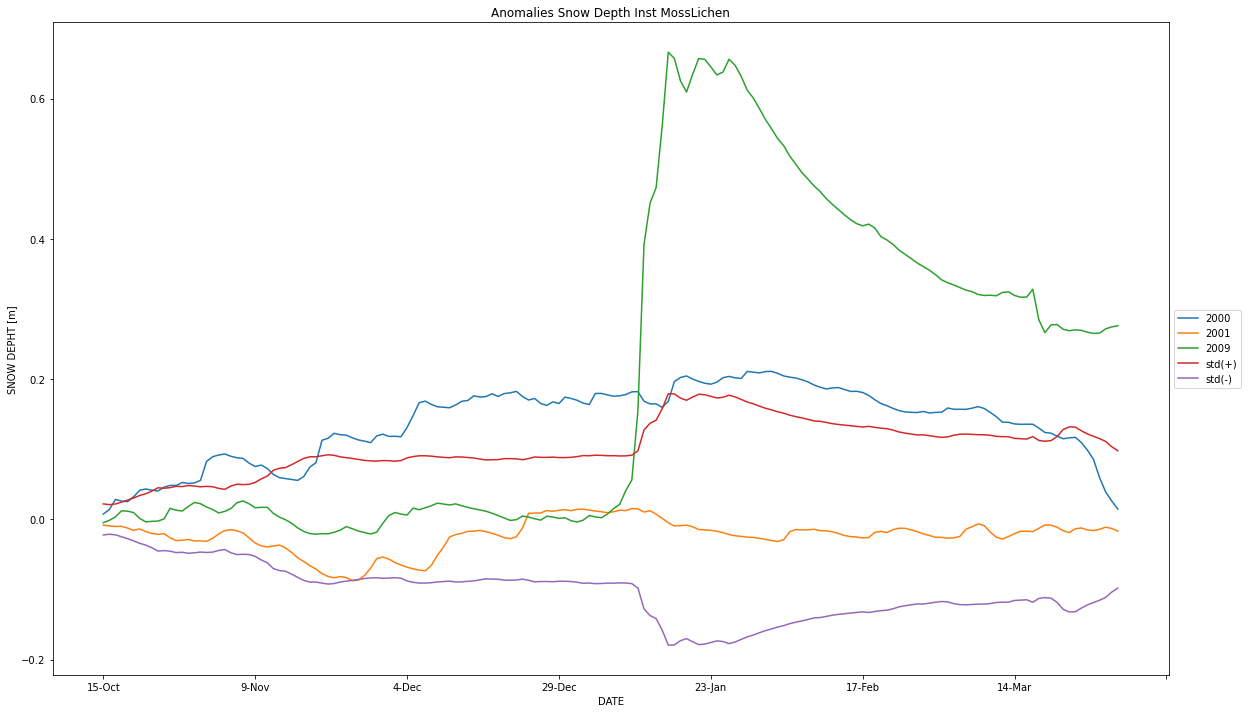

In [32]:

df.plot(x='date', y=['2000', '2001', '2009', 'std(+)', 'std(-)'], figsize=(20, 12))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Anomalies Snow Depth Inst MossLichen')
plt.xlabel("DATE")
plt.ylabel("SNOW DEPHT [m]")

plt.savefig('Anomalies Snow Depth Inst MossLichen.jpeg')
plt.show()
